# 5.  Predicting Flight Delays:

## 1. Get to know the problem 

This is a binary classification problem using mostly numerical predictators, except for one feature, UniqueCarrier is the categorical data. 

Here I built several different models to predict whether a flight will be canceled based on several factors.

But I will start with logistic regression model, since our client want to know which airline (AA,UA, and DL) has the least risk of cancellation. 

##  2. Which airline has the least risk of cancellation

Here, the eight variables are very self-explanative. 

###  2.1 Loading  the data

In [161]:
 # Import pandas 
import pandas as pd

# Read data 
data = pd.read_csv("/users/janechou24/Python/exercise/CancelledFlights.csv", names=['Canceled','Month','DepartureTime','UniqueCarrier','SchedElapsedTime','ArrDelay','DepDelay','Distance'])




### 2.2 Summary statistics & looking at the data

In [164]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# summary the data
print(data.describe())


          Canceled        Month  DepartureTime  SchedElapsedTime     ArrDelay  \
count  6000.000000  6000.000000    6000.000000       6000.000000  6000.000000   
mean      0.166667     6.220167    1330.466500        161.693500     8.113000   
std       0.372709     3.436325     459.118234         78.064979    35.763134   
min       0.000000     1.000000       5.000000         40.000000   -72.000000   
25%       0.000000     3.000000     930.000000        105.000000    -8.000000   
50%       0.000000     6.000000    1325.000000        145.000000     0.000000   
75%       0.000000     9.000000    1715.000000        200.000000    10.000000   
max       1.000000    12.000000    2359.000000        604.000000   410.000000   

          DepDelay     Distance  
count  6000.000000  6000.000000  
mean      9.148833   987.588833  
std      31.669299   646.666931  
min     -16.000000    68.000000  
25%      -3.000000   547.000000  
50%       0.000000   837.000000  
75%       6.000000  1249.000000 

In [165]:
# And take a look of it 
print(data.head())


   Canceled  Month  DepartureTime UniqueCarrier  SchedElapsedTime  ArrDelay  \
0         1     12            814            UA               134         0   
1         1     12            830            DL                90         0   
2         1      1           1835            UA               213         0   
3         1      4           1730            AA                80         0   
4         1      7           1442            UA               103         0   

   DepDelay  Distance  
0         0       679  
1         0       214  
2         0      1605  
3         0       235  
4         0       413  


In [166]:
# See whether existing missing values 
pd.isnull(data)


,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [116]:
# See the values' flutuation 
print (data.std())

Canceled              0.372709
Month                 3.436325
DepartureTime       459.118234
SchedElapsedTime     78.064979
ArrDelay             35.763134
DepDelay             31.669299
Distance            646.666931
dtype: float64


In [176]:
# To have a traditional probability perspective answer for the question: 

import pandas as pd
print(pd.crosstab(data['Canceled'], data['UniqueCarrier'], rownames=['Canceled']))

Cancellratio_AA = 493/(1983+493)
Cancellratio_DL = 189/(1499+189)
Cancellratio_UA = 318/(1518+318)

UniqueCarrier    AA    DL    UA
Canceled                       
0              1983  1499  1518
1               493   189   318


In [173]:
print(Cancellratio_AA)

0.1991114701130856


In [174]:
print(Cancellratio_DL)

0.11196682464454977


In [175]:
print(Cancellratio_UA)

0.17320261437908496


Here we could conclude that from our existing dataset, the cancellation ratio of Airline DL is the lowest, however, this approach is biased by our dataset, therefore, the final answer would be provided by the log-ratio of the logistic model. 

### 2.3 Data visualization 

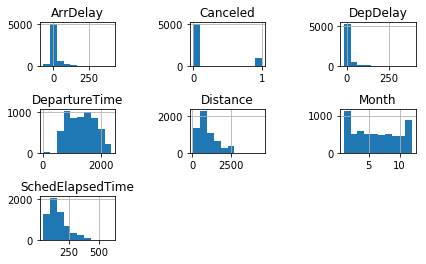

In [180]:
import matplotlib.pyplot as plt
data.hist()
pl.subplots_adjust(left=0.08, right=0.95, wspace=1, hspace=1)
pl.show()

Here we can see our dataset is not very balanced, there are much less cancellation cases than non-cancellation, therefore, in our model evalution, we need compare our prediction with guessing non-cancellation all the time.

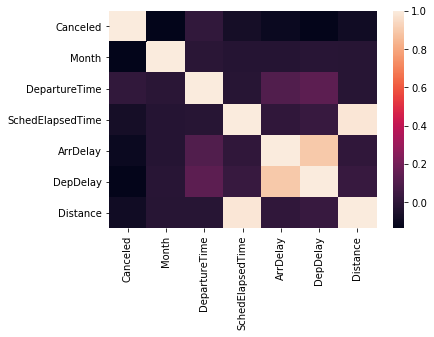

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Here we can see the ArrDelay and DepDelay are correlated with each other, and it is in our common sense, if the flight departs late, it is highly possibly it will also arrive late. Therefore, if our future modelling didn't perform well, we may work on getting rid of one of them. 

### 2.4  Dummy variables

Here, to deal with the categorical preditor, I used a dummy coding to transfer it from sting to numerical, and it is in line with the logistica model, thus we could interprete it afterwards. 

In [181]:
dummy_ranks = pd.get_dummies(data['UniqueCarrier'], prefix='Carrier')
print(dummy_ranks.head())

   Carrier_AA  Carrier_DL  Carrier_UA
0           0           0           1
1           0           1           0
2           0           0           1
3           1           0           0
4           0           0           1


In [182]:
# Here I include the intercept as the Carrier_AA. 
cols_to_keep = ['Canceled','Month','DepartureTime','SchedElapsedTime','ArrDelay',
                'DepDelay', 'Distance']
    
logdata = data[cols_to_keep].join(dummy_ranks.loc[:, ['Carrier_DL','Carrier_UA']])
logdata['intercept'] = 1.0
print (logdata.head())

   Canceled  Month  DepartureTime  SchedElapsedTime  ArrDelay  DepDelay  \
0         1     12            814               134         0         0   
1         1     12            830                90         0         0   
2         1      1           1835               213         0         0   
3         1      4           1730                80         0         0   
4         1      7           1442               103         0         0   

   Distance  Carrier_DL  Carrier_UA  intercept  
0       679           0           1        1.0  
1       214           1           0        1.0  
2      1605           0           1        1.0  
3       235           0           0        1.0  
4       413           0           1        1.0  


### 2.5  Performing the regression

In [183]:
import statsmodels.api as sm

train_cols = logdata.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(logdata['Canceled'], logdata[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.408349
         Iterations 8


### 2.6  Interpreting the results

In [152]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Canceled   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5991
Method:                           MLE   Df Model:                            8
Date:                Sun, 26 Nov 2017   Pseudo R-squ.:                 0.09369
Time:                        14:44:40   Log-Likelihood:                -2450.1
converged:                       True   LL-Null:                       -2703.4
                                        LLR p-value:                2.772e-104
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Month               -0.1159      0.011    -10.638      0.000      -0.137      -0.095
DepartureTime        0.0003   8.01e-05      3.306      0.001       0.000       0.000
SchedElapsedTime     0.0184 

Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being cancelled. 

The odds equals the ratio between the probability of an event and  the probability of a non-event. Here our event is flight cancellation. And the odds ratio is the ratio between two cases'odds.


For example, we can expect as an odds ratio less than 1 implies a negative relationship,larger than 1 implies postive relationship. Here intercept, i.e. Carrier_AA has the least odds ratio, which means the odds of carrier_AA being cancelled is 0.28 times of the odds of other two carrier being cancelled. 

Therefore, we could advise our customers that AA airline, has the least odds, or put it another way, has the least probability of cancelation, i.e. the least risk of cancellation.

In [185]:
# Calculate the odds ratio. 
print (np.exp(result.params))


Month               0.890554
DepartureTime       1.000265
SchedElapsedTime    1.018618
ArrDelay            1.005430
DepDelay            0.954870
Distance            0.997308
Carrier_DL          0.412851
Carrier_UA          0.837520
intercept           0.285230
dtype: float64


### 2.7  Predict on new data

Here I wrote a function using logistic model output to predict whether a flight will be canceled. In this case, you need to have the predictors values ready and then you could call the function, it will return to a proability of being cancelled based on the input.

Normally, we use 0.5 as a threhold for the classfication, if the proability is less than 0.5, we could predict it will not be cancelled based on the information

In [189]:
x=[12,800,134,0,0,0,600,0,0]

def predict_cancel_log(x):
    y_pred = result.predict(x)
    return(y_pred)

predict_cancel_log(x)

array([  1.08941043e-230])

##  3 . More prediction models 
Here I will use other machine learning methods like neural network, K-NN, etc. to do the prediction. 

### 3.1 Neural network 


#### 3.1.1 Encoding categorical values

In [193]:

from sklearn.preprocessing import LabelBinarizer,LabelEncoder
encoder = LabelEncoder()
data['UniqueCarrier'] = encoder.fit_transform(data['UniqueCarrier'].astype('str'))

# AA:0, DL:1, UA:2
data.head(5)

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1,12,814,2,134,0,0,679
1,1,12,830,1,90,0,0,214
2,1,1,1835,2,213,0,0,1605
3,1,4,1730,0,80,0,0,235
4,1,7,1442,2,103,0,0,413


#### 3.1.2  Feature extraction and selection

If dealing with unstructured data like text or image, we first need extract numerical features from data, here I could only do the feature selection part, it's a trial and error process, to begin with, I tried with the whole features provided. 

#### 3.1.3  Time to get to the model 

In [200]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Specify the data 
# X = data.loc[:,['Month','DepartureTime','UniqueCarrier','SchedElapsedTime','ArrDelay',' DepDelay', 'Distance']]
# y = data.loc[:,'Canceled']
# Specify the target labels and flatten the array
X = data.ix[:,1:8]
y = np.ravel(data.Canceled)


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(7,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

#### 3.1.4  Model output

In [201]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.27024132,  0.44427234, -0.3544026 , -0.04719263,  0.07320273,
          0.60442156,  0.44087499,  0.33532733],
        [ 0.33530182, -0.3213338 ,  0.01171237,  0.45314068,  0.0979048 ,
          0.62229222,  0.44626969, -0.22074386],
        [ 0.51410717, -0.29249054,  0.35965592,  0.26467764, -0.39673543,
         -0.58547187,  0.18905735,  0.10271639],
        [-0.54689115,  0.40789789, -0.59163904, -0.21388069,  0.1132496 ,
         -0.22547728,  0.5441851 ,  0.26034153],
        [-0.61801988,  0.42736715,  0.30368811, -0.00454342,  0.48824567,
         -0.17185077, -0.36817494, -0.38221249],
        [ 0.60518414, -0.11153978, -0.08666319,  0.21750414, -0.57183528,
         -0.39851463, -0.52662295,  0.03010041],
        [-0.13790873, -0.55722576, -0.34223723,  0.1035071 ,  0.4770599 ,
         -0.24313921,  0.55417424,  0.35044032]], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32),
 array([[-0.47457457, -0.49574658,  0.09515452, -0.451046

In [202]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.4207 - acc: 0.8376
Epoch 2/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.3613 - acc: 0.8403
Epoch 3/20
4020/4020 [==============================] - 9s 2ms/step - loss: 0.2863 - acc: 0.8510
Epoch 4/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.1925 - acc: 0.9286
Epoch 5/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.1358 - acc: 0.9585
Epoch 6/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.1073 - acc: 0.9662
Epoch 7/20
4020/4020 [==============================] - 11s 3ms/step - loss: 0.0928 - acc: 0.9709
Epoch 8/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.0855 - acc: 0.9724
Epoch 9/20
4020/4020 [==============================] - 9s 2ms/step - loss: 0.0790 - acc: 0.9746
Epoch 10/20
4020/4020 [==============================] - 10s 2ms/step - loss: 0.0741 - acc: 0.9781
Epoch 11/20
4020/4020

#### 3.1.5  Model evaluation

In [205]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

1980/1980 [==============================] - 0s 41us/step
[0.16914608288895, 0.93131313155395812]


The score is a list that holds the combination of the loss and the accuracy. In this case, you see that both seem very great. 

#### 3.1.6  How to run the model by calling function 
In this neural network, since I used a sigmoid activation function for the output, so the output would be the probability of cancellation, and we could choose 0.5 as the threhold as well. 

In [218]:
# for example, a new observation is:
X_new = [[12,830,2,90,0,0,214]]


def predict_cancel_neural(X):
    X_newstandard = scaler.transform(X)
    y_pred = model.predict(X_newstandard)
    return y_pred
# Here we predict it will be cancelled in this input.
predict_cancel_neural(X_new)

array([[ 0.95814508]], dtype=float32)

### 3.2 Naive_bayes
#### 3.2.1  Bernoulli
You could call the predict_cancel_BernoulliNB function on new data and it will return to 0 or 1, representing not cancel or cancel, respectively. 

In [217]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, y)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

def predict_cancel_BernoulliNB(X): 
    y_pred = clf.predict(X)
    return y_pred

predict_cancel_BernoulliNB(X_new)

array([0])

#### 3.2.2 Gaussian

In [219]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print("Number of mislabeled points out of a total %d points : %d" 
      % (data.shape[0],(y != y_pred).sum()))

def predict_cancel_GaussianNB(X_new): 
    y_pred = gnb.fit(X, y).predict(X_new)
    return y_pred

predict_cancel_GaussianNB(X_new)

Number of mislabeled points out of a total 6000 points : 141


array([1])

### 3.3 K-NN

In [220]:
# 3.2  instantiate a K-NN model
from sklearn.neighbors import KNeighborsClassifier

# 2. instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# In order to make a prediction, 
# the new observation must have the same features as the training observations, both in number and meaning.

# 3. fit the model with data (occurs in-place)
knn.fit(X, y)

# 4. predict the response for a new observation
# here you pass in 4 features, the number of features that have been learned
knn.predict(X_new)


def predict_cancel_KNN(X_new): 
    y_pred = knn.predict(X_new)
    return y_pred

predict_cancel_KNN(X_new)

array([1])

# 4. Final conclusion

To predict whether a flight will be canceled.The user could use all the above method including logistic regression,  neural network, different naive bayes, and k-nn functions to get the prediction, then determine the final answer with the majority of the output of the models.



For example: in this case, with the X_new[12, 830, 2, 90, 0, 0, 214], only Bernoulli naive bayes predict would be non-cancellation, but others all think it would be cancelled, so we predict this case be cancelled. You can expand this analysis to many other new inputs as well.


And for the dataset provided, I will suggest that AA airline has the least risk of cancellation comparing with other two. 

